In [159]:
import cv2 

img = cv2.imread('../../flowers/astilbe/10091895024_a2ea04cda6_c.jpg')
""" img = cv2.imread('/home/angel/Desktop/IA/sportimages/basket/basket_0004.jpg') """

print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

256 256 3 3


# Convolutional Neural Networks

# Importar Librerías

In [160]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from skimage.transform import resize
from skimage import img_as_ubyte

In [161]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

from tensorflow.python.client import device_lib

# Check available devices
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15349590162929214422
xla_global_id: -1
]


In [162]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


# Cargar set de Imágenes

In [163]:
dirname = os.path.join(os.getcwd(),'../../flowers/')
""" dirname = os.path.join(os.getcwd(),'/home/likcos/DataSets/sportimages/sportimages') """
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

small_size = (128, 128, 3)  # Adjust the size as needed

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                resized_image = resize(image, small_size)
                resized_image = img_as_ubyte(resized_image)
                images.append(resized_image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            """ if len(image.shape) == 2:
                # Grayscale image - delete the file
                print(f"Deleting: {filepath} - Grayscale image")
                os.remove(filepath) 
            # Deleted all non RGB images
            """
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  c:\Users\jorge\Desktop\Tec\9no Sem\Tecnm-ITM_IA\CNN\../../flowers/\
c:\Users\jorge\Desktop\Tec\9no Sem\Tecnm-ITM_IA\CNN\../../flowers/\astilbe 1
c:\Users\jorge\Desktop\Tec\9no Sem\Tecnm-ITM_IA\CNN\../../flowers/\bellflower 736
c:\Users\jorge\Desktop\Tec\9no Sem\Tecnm-ITM_IA\CNN\../../flowers/\black_eyed_susan 872
c:\Users\jorge\Desktop\Tec\9no Sem\Tecnm-ITM_IA\CNN\../../flowers/\calendula 1000
c:\Users\jorge\Desktop\Tec\9no Sem\Tecnm-ITM_IA\CNN\../../flowers/\california_poppy 978
c:\Users\jorge\Desktop\Tec\9no Sem\Tecnm-ITM_IA\CNN\../../flowers/\carnation 1020
c:\Users\jorge\Desktop\Tec\9no Sem\Tecnm-ITM_IA\CNN\../../flowers/\common_daisy 923
c:\Users\jorge\Desktop\Tec\9no Sem\Tecnm-ITM_IA\CNN\../../flowers/\coreopsis 980
c:\Users\jorge\Desktop\Tec\9no Sem\Tecnm-ITM_IA\CNN\../../flowers/\daffodil 1047
c:\Users\jorge\Desktop\Tec\9no Sem\Tecnm-ITM_IA\CNN\../../flowers/\dandelion 970
c:\Users\jorge\Desktop\Tec\9no Sem\Tecnm-ITM_IA\CNN\../../flowers/\iris 1048
c:\Users

# Creamos las etiquetas

In [164]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  14749


In [165]:
flores=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    flores.append(name[len(name)-1])
    indice=indice+1

0 astilbe
1 bellflower
2 black_eyed_susan
3 calendula
4 california_poppy
5 carnation
6 common_daisy
7 coreopsis
8 daffodil
9 dandelion
10 iris
11 magnolia
12 rose
13 sunflower
14 tulip


In [166]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  15
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


# Creamos Sets de Entrenamiento y Test

In [167]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)
print(len(images))


Shape of X: (14749, 128, 128, 3)
Shape of y: (14749,)
14749


In [168]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (11799, 128, 128, 3) (11799,)
Testing data shape :  (2950, 128, 128, 3) (2950,)


Text(0.5, 1.0, 'Ground Truth : 8')

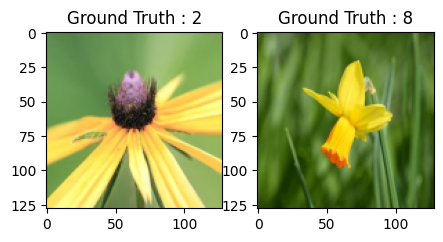

In [169]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

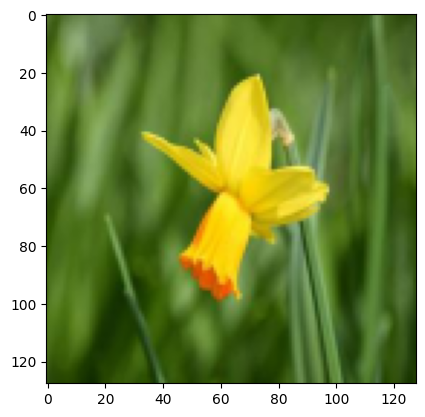

In [170]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [171]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 2
After conversion to one-hot: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [172]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [173]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(9439, 128, 128, 3) (2360, 128, 128, 3) (9439, 15) (2360, 15)


# Creamos el modelo de CNN

In [174]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 40 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [175]:
flor_model = Sequential()
flor_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(128,128,3)))
flor_model.add(LeakyReLU(alpha=0.1))
flor_model.add(MaxPooling2D((2, 2),padding='same'))
flor_model.add(Dropout(0.5))

flor_model.add(Conv2D(64, kernel_size=(3, 3), activation='linear', padding='same'))
flor_model.add(LeakyReLU(alpha=0.1))
flor_model.add(MaxPooling2D((2, 2), padding='same'))
flor_model.add(Dropout(0.5))

flor_model.add(Flatten())
flor_model.add(Dense(32, activation='linear'))
flor_model.add(LeakyReLU(alpha=0.1))
flor_model.add(Dropout(0.5))
flor_model.add(Dense(nClasses, activation='softmax'))

In [176]:
flor_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 128)       36992     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 32, 32, 128)       0         
 g2D)                                                 

In [177]:
flor_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [178]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flor_train = flor_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/150
148/148 [==============================] - 57s 384ms/step - loss: 2.6904 - accuracy: 0.0941 - val_loss: 2.6507 - val_accuracy: 0.1733
Epoch 2/150
148/148 [==============================] - 57s 385ms/step - loss: 2.6311 - accuracy: 0.1228 - val_loss: 2.5817 - val_accuracy: 0.2038
Epoch 3/150
148/148 [==============================] - 58s 390ms/step - loss: 2.5651 - accuracy: 0.1462 - val_loss: 2.5051 - val_accuracy: 0.1983
Epoch 4/150
148/148 [==============================] - 58s 389ms/step - loss: 2.5135 - accuracy: 0.1605 - val_loss: 2.4419 - val_accuracy: 0.2246
Epoch 5/150
148/148 [==============================] - 57s 385ms/step - loss: 2.4677 - accuracy: 0.1671 - val_loss: 2.3934 - val_accuracy: 0.2441
Epoch 6/150
148/148 [==============================] - 57s 388ms/step - loss: 2.4305 - accuracy: 0.1836 - val_loss: 2.3488 - val_accuracy: 0.2538
Epoch 7/150
148/148 [==============================] - 57s 383ms/step - loss: 2.3863 - accuracy: 0.1972 - val_loss: 2.3051 -

KeyboardInterrupt: 

In [ ]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
""" flor_model.save("/home/likcos/setDocto/celulas.h5py") """
flor_model.save("./flor_model.h5py")

INFO:tensorflow:Assets written to: ./flor_model.h5py\assets


INFO:tensorflow:Assets written to: ./flor_model.h5py\assets


# Evaluamos la red

In [ ]:
test_eval = flor_model.evaluate(test_X, test_Y_one_hot, verbose=1)

93/93 [==============================] - 1s 12ms/step - loss: 1.4700 - accuracy: 0.5075


In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.470011591911316
Test accuracy: 0.5074576139450073


In [ ]:
flor_train.history

{'loss': [2.621365547180176,
  2.49899959564209,
  2.4320449829101562,
  2.3881168365478516,
  2.3511977195739746,
  2.3248355388641357,
  2.288756847381592,
  2.2596006393432617,
  2.237818956375122,
  2.2177634239196777,
  2.2037882804870605,
  2.186608076095581,
  2.169182538986206,
  2.159330129623413,
  2.1411423683166504,
  2.1178131103515625,
  2.1131529808044434,
  2.0927202701568604,
  2.0780324935913086,
  2.0749828815460205,
  2.0511627197265625,
  2.0584728717803955,
  2.0383927822113037,
  2.031522274017334,
  2.018907308578491,
  2.0056955814361572,
  2.0029475688934326,
  1.9936107397079468,
  1.9768238067626953,
  1.9737223386764526,
  1.9630197286605835,
  1.961832880973816,
  1.9481874704360962,
  1.9345752000808716,
  1.927803874015808,
  1.919653296470642,
  1.916547417640686,
  1.9055936336517334,
  1.9062191247940063,
  1.9037007093429565,
  1.8962723016738892,
  1.8798227310180664,
  1.8775436878204346,
  1.8782498836517334,
  1.875227451324463,
  1.8622297048568

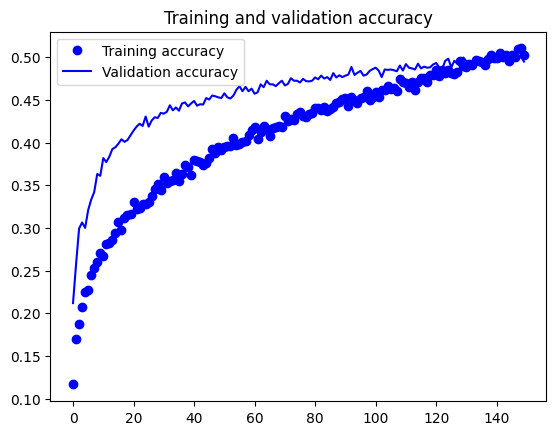

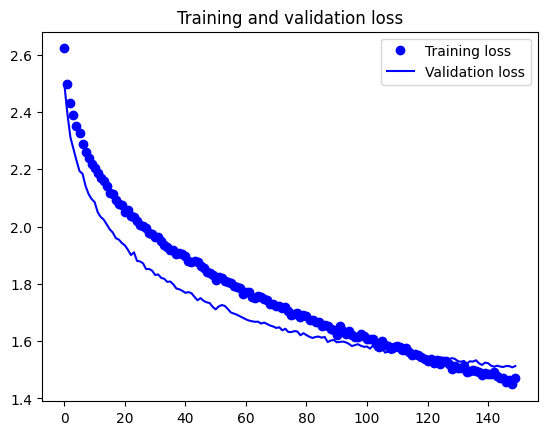

In [ ]:
accuracy = flor_train.history['accuracy']
val_accuracy = flor_train.history['val_accuracy']
loss = flor_train.history['loss']
val_loss = flor_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes2 = flor_model.predict(test_X)

93/93 [==============================] - 1s 12ms/step


In [ ]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [ ]:
predicted_classes.shape, test_Y.shape

((2950,), (2950,))

# Aprendamos de los errores: Qué mejorar

Found 1497 correct labels


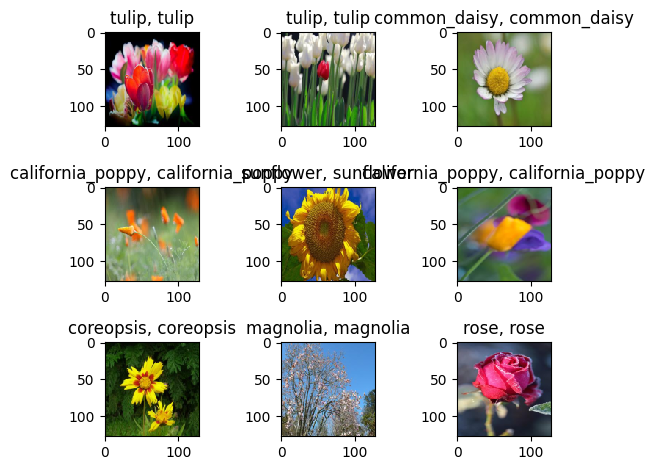

In [ ]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(128,128,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[correct]],
                                                    flores[test_Y[correct]]))

    plt.tight_layout()

Found 1453 incorrect labels


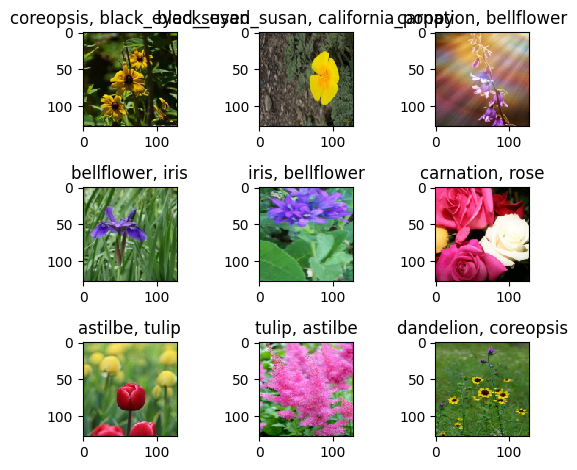

In [ ]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(128,128,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[incorrect]],
                                                    flores[test_Y[incorrect]]))
    plt.tight_layout()

In [ ]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.52      0.32      0.40       158
     Class 1       0.53      0.30      0.38       181
     Class 2       0.54      0.51      0.52       208
     Class 3       0.36      0.31      0.33       176
     Class 4       0.37      0.38      0.37       198
     Class 5       0.35      0.27      0.30       183
     Class 6       0.55      0.55      0.55       178
     Class 7       0.50      0.47      0.48       223
     Class 8       0.47      0.61      0.53       171
     Class 9       0.57      0.60      0.58       219
    Class 10       0.68      0.70      0.69       217
    Class 11       0.40      0.66      0.50       208
    Class 12       0.50      0.57      0.53       211
    Class 13       0.72      0.69      0.70       217
    Class 14       0.56      0.54      0.55       202

    accuracy                           0.51      2950
   macro avg       0.51      0.50      0.50      2950
weighted avg       0.51   